# Data Collection 


+ read data images
+ image visualization utilities 
+ tf.data.Dataset creation 

In [53]:
import os 
import pathlib
import numpy as np
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt
import utils 
import cv2 

from PIL import Image 

In [6]:
data_dir = 'data/'
data_dir = pathlib.Path(data_dir)

In [151]:
img = utils.Image('data/beach/beach01.jpg')

In [152]:
w_size = 7

X = list()
y = list() 
blues = list()
greens = list()
reds = list()

for i in range(100): 
    for j in range(100): 
        
        i_ = i + img.padding
        j_ = j + img.padding
        
        grays, b, g, r = img.get_dataset_for_pixel(i_, j_, window_size=w_size)
        X.append(grays)
        blues.append(b)
        greens.append(g)
        reds.append(r)
        y.append((b, g, r))
        
        
X = np.array(X)
blues = np.array(blues).reshape(-1, 1)
greens = np.array(greens).reshape(-1, 1)
reds = np.array(reds).reshape(-1, 1)
y = np.array(y)

In [153]:
X = utils.normalize(X)
y = utils.normalize(y)

In [134]:
from tensorflow.keras.layers import Dense, InputLayer

In [135]:
model = tf.keras.Sequential([ 
    Dense(100, input_shape=(w_size**2, ), activation='sigmoid'), 
    Dense(50, activation='relu'), 
    Dense(3, activation='relu')
])

model.compile(optimizer='adam', loss='mse')  

In [136]:
history = model.fit(X, y, epochs=100, verbose=2)

Train on 10000 samples
Epoch 1/100
10000/10000 - 1s - loss: 0.0138
Epoch 2/100
10000/10000 - 1s - loss: 0.0072
Epoch 3/100
10000/10000 - 1s - loss: 0.0063
Epoch 4/100
10000/10000 - 1s - loss: 0.0055
Epoch 5/100
10000/10000 - 1s - loss: 0.0051
Epoch 6/100
10000/10000 - 1s - loss: 0.0051
Epoch 7/100
10000/10000 - 1s - loss: 0.0047
Epoch 8/100
10000/10000 - 1s - loss: 0.0047
Epoch 9/100
10000/10000 - 1s - loss: 0.0045
Epoch 10/100
10000/10000 - 2s - loss: 0.0044
Epoch 11/100
10000/10000 - 1s - loss: 0.0044
Epoch 12/100
10000/10000 - 1s - loss: 0.0044
Epoch 13/100
10000/10000 - 1s - loss: 0.0044
Epoch 14/100
10000/10000 - 1s - loss: 0.0042
Epoch 15/100
10000/10000 - 1s - loss: 0.0043
Epoch 16/100
10000/10000 - 1s - loss: 0.0043
Epoch 17/100
10000/10000 - 1s - loss: 0.0043
Epoch 18/100
10000/10000 - 1s - loss: 0.0040
Epoch 19/100
10000/10000 - 1s - loss: 0.0040
Epoch 20/100
10000/10000 - 1s - loss: 0.0041
Epoch 21/100
10000/10000 - 1s - loss: 0.0040
Epoch 22/100
10000/10000 - 1s - loss: 0.0

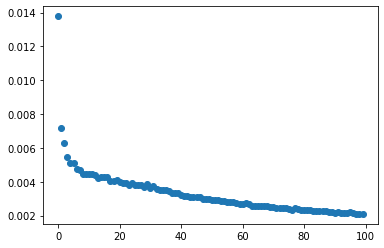

In [137]:
l = history.history['loss']
plt.scatter(np.arange(len(l)), l)

## Testing 

In [154]:
y_pred = model.predict(X)

In [155]:
colored = utils.reconstruct_from_vectors(blue=y_pred[:, 0], green=y_pred[:, 1], 
                                         red=y_pred[:, 2], dimension=100)
colored = utils.to_255_scale(colored)

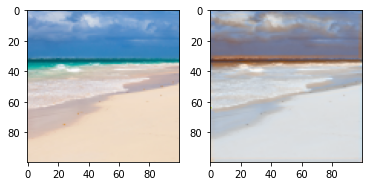

In [156]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(img.data_nopadding, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(colored.astype('uint8'), cv2.COLOR_BGR2RGB))

In [157]:
colored.reshape(-1, 3)

array([[232, 180, 144],
       [235, 177, 136],
       [221, 173, 138],
       ...,
       [222, 215, 205],
       [216, 212, 219],
       [200, 207, 231]], dtype=uint8)